#**Algoritmo de Metropolis**
Uno de los métodos MCMC (Markov chain Monte Carlo) más populares es el algoritmo Metropolis-Hastings; de hecho la mayoría de los algoritmos de MCMC pueden ser interpretados como casos especiales de este algoritmo. El algoritmo Metropolis-Hastings esta catalogado como uno de los 10 algoritmos más importantes y más utilizados en ciencia e ingeniería en los últimos veinte años.Se encuentra en el corazón de la mayoría de los métodos de muestreo MCMC. El problema básico que intenta resolver el algoritmo Metropolis-Hastings es proporcionar un método para generar muestras de alguna distribución genérica, $p(x)$. La idea es que en muchos casos, podemos saber cómo escribir la ecuación para la distribución de probabilidad $p(x)$, pero no sabemos cómo generar muestras aleatorias de la misma. Entonces la idea básica detrás de este algoritmo es la de construir una cadena de Markov cuya distribución sea la distribución de muestreo que deseamos, es decir $p(x)$. En principio, esto puede parecer bastante complicado, pero la flexibilidad inherente en la elección de las probabilidades de transición lo hacen más simple de lo que parece.


##**Balance detallado**
La mecánica estadística de Boltzmann exige que todas las configuraciones permitidas de un número determinado de partículas se generen con el mismo peso estadístico. Esto se puede poner en práctica generando todas las configuraciones, permitidas y no permitidas, con la misma probabilidad y luego rechazando las no permitidas. Lo que queda son las configuraciones más probables.

Vamos a realizar el juego que se muestra en la figura. La piedra puede moverse en al menos cuatro direcciones: arriba, abajo, izquierda y derecha. 

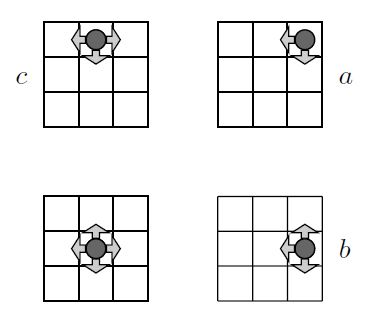

Buscamos un algoritmo para mover la piedra paso a paso de manera que, después de muchas iteraciones, aparezca con la misma probabilidad en cada uno de los campos. Para entender por qué debemos construir pilotes, consideremos la configuración de la esquina $a$, que está en contacto con las configuraciones $b$ y $c$. Nuestro algoritmo (aún por encontrar) debe generar las configuraciones $a$, $b$ y $c$ con probabilidades prescritas $π(a)$, $π(b)$ y $π(c)$, respectivamente, que requerimos que sean iguales. 

Esto significa que queremos crear estas configuraciones con probabilidades
\begin{equation}
  \pi(a), \pi(b),... = 
   \begin{cases} 
      probabilidad\, de\, que    \\
      el\, sistema\, esté\, en\, a, b, etc.
   \end{cases}
\end{equation}

con la ayuda de nuestro algoritmo de Monte Carlo, que no es más que un conjunto de probabilidades de transición $p(a → b)$ para pasar de una configuración a la otra (de $a$ a $b$),

\begin{equation}
  p(a → b), p(a → c),... = 
   \begin{cases} 
      probabilidad\, de\, que    \\
      el\, algoritmo\, se\, mueva\, desde\, a\, hasta\, b, etc.
   \end{cases}
\end{equation}

Además, hacemos cumplir una condición de normalización que nos dice que la piedra, una vez esté en $a$, puede permanecer allí o moverse hacia $b$ o $c$:

$$p(a → a) + p(a → b) + p(a → c) = 1$$ 

Los dos tipos de probabilidades se pueden relacionar observando que la configuración $a$ solo puede generarse a partir de $b$ o $c$ o de sí misma:

$$π(a) = π(b)p(b → a) + π(c)p(c → a) + π(a)p(a → a),$$

lo que da

$$π(a)[1 − p(a → a)] = π(b)p(b → a) + π(c)p(c → a).$$

Pero teniendo en cuenta la condición de normalización como $1−p(a → a) = p(a → b)+p(a → c)$ e introduciéndola en la última ecuación tenemos:

$$π(a) p(a → b) + π(a)p(a → c) =  π(b)p(b → a) + π(c) p(c → a).$$

Esta ecuación se puede satisfacer igualando los términos entre paréntesis por separado, y así llegamos a la condición crucial del **balance detallado**. Es decir, que en equilibrio, los valores de la función de distribución en diferentes puntos del espacio están relacionados por

\begin{equation}
  balance\,detallado = 
   \begin{cases} 
      π(a) p(a → b) = π(b)p(b → a)    \\
      π(a)p(a → c) = π(c) p(c → a)
   \end{cases}
\end{equation}

En el juego de las piedras, se satisface el equilibrio detallado porque todas las probabilidades de moverse entre sitios vecinos son iguales a 1/4, y las probabilidades $p(a → b)$ y las probabilidades de retorno $p(b → a)$ son trivialmente idénticas. Ahora vemos por qué las piedras tienen que amontonarse en los lados y en las esquinas: todas las probabilidades de transición a vecinos tienen que ser iguales a 1/4. Pero una esquina tiene solo dos vecinos, lo que significa que la mitad del tiempo podemos abandonar el sitio, y la mitad del tiempo debemos quedarnos, construyendo una pila.

Con la condición de balance detallado, los puntos ya no se muestrean aleatoriamente sino siguiendo una cadena de Markov. La transición de un punto $a$ a otro punto $b$ se acepta si la relación de las tasas de transición satisface

$$\dfrac{p(a → b)}{p(b → a)} = \dfrac{\pi(b)}{\pi(a)} > w_i$$

donde $w_i$ es un número aleatorio uniforme en la región $[0, 1]$. 





#**Metropolis**

Los movimientos entre las posiciones $a$ y $b$ con probabilidades arbitrarias $π(a)$ y $π(b)$, respetando la condición de balance detallado, son generados por el algoritmo de Metropolis, que acepta un movimiento $a → b$ con una probabilidad de

$$p(a → b) = min\left[1,\dfrac{π(b)}{π(a)}\right]$$








##**¿Cómo funciona el algoritmo?**

El algoritmo funciona de la siguiente manera. Suponga que el estado actual de la cadena de Markov es $x_n$, y queremos generar $x_{n+1}$. De acuerdo con el algoritmo de Metropolis-Hastings, la generación de $x_{n+1}$ se puede dividir en dos pasos. 
* **Paso 1** Consiste en generar un candidato, que denominaremos $x_p$. El valor de $x_p$ se genera a partir de una distribución propuesta, que depende del estado actual de la cadena de Markov, $x_n$. Existen algunas limitaciones técnicas menores sobre la distribución propuesta que podemos utilizar, pero en la mayoría de los casos podía ser cualquier distribución que deseemos. Una forma típica de hacerlo es utilizar una distribución normal centrada en el estado actual $x_n$. Es decir, $\mathcal{N}(x_n,σ^2)$

* **Paso 2** Esta segunda etapa es la de aceptación-rechazo. Lo primero que debemos hacer en este paso es calcular la probabilidad de aceptación $p_{acept}(x_n→x_p)$, la cual estará dada por:

$$p_{acept}(x_n→x_p) = min\left(1,\dfrac{π(a)}{π(b)}\right)$$

Ahora que tenemos el candidato $x_p$ y hemos calculado la probabilidad de aceptación $p_{acep}(x_n→x_p)$, debemos aceptar el candidato (en cuyo caso establecemos $x_{n+1}=x_p$); o rechazar al candidato. Para tomar esta decisión, generamos un número aleatorio (uniformemente distribuido) entre 0 y 1, que denominaremos $u$. Entonces:

$$Si\,\,\,\, u≤p(x_n→x_p)\,\,\,\, →\,\,\,\, x_{n+1}=x_p$$

$$Si\,\,\,\, u>p(x_n→x_p)\,\,\,\, →\,\,\,\, x_{n+1}=x_n$$

Esto es en esencia como funciona el algoritmo de Metropolis-Hastings!

En resumen:


1. Establezca el número de muestras.
2. Establezca un punto de unicio $x_n$ (estado actual de la cadena).
3. Establezca un $\Delta x$
4. Proponga un número aleatorio $x_p$, el cual estará centrado en $x_n$, y puede ser $x_n + \Delta x$ o $x_n - \Delta x$; es decir, $x_p = x_n + U(-\Delta x, +\Delta x)$
5. Evalúe si acepta o rechaza el número propuesto teniendo en cuenta la condición de balance detallado. Para tomar esta decisión, generamos un número aleatorio (uniformemente distribuido) entre 0 y 1, que denominaremos $u$. Entonces:

$$Si\,\,\,\, u ≤ min\left(1,\dfrac{f(x_n)}{f(x_p)}\right)\,\,\,\, →\,\,\,\, x_{n+1}=x_p$$ 

En este caso, el número propuesto se acepta, formandpo parte de la cadena

$$Si\,\,\,\, u > min\left(1,\dfrac{f(x_n)}{f(x_p)}\right)\,\,\,\, →\,\,\,\, x_{n+1}=x_n$$ 

En tal caso, el número propuesto se rechaza y continuamos en el estado actual (permanecemos en el mismo lugar). 
$$$$




Vamos a empezar con un ejemplo sencillo, realizar un muestreo de una distribución gaussina:

$$f(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Si tenemos esta distribución de probabilidad, vamos a empezar haciendo una caminata aleatoria (cadena de Markov) sobre esta función con $\mu = 0.2$, $\sigma = 0.1$ y $\Delta x = 0.5$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, mu, std):
  return (1/np.sqrt(2*np.pi*std**2)) * np.exp(-(x-mu)**2/(2*std**2))

mu = 0.2
sigma = 0.1
delta = 0.5

n = 100000
x = np.zeros(n)
x[0] = 0

for i in range(0,n-1):
  xp = x[i] + np.random.uniform(-delta , delta) #el número aleatorio propuesto estará centrado en x_0, pero puede ser x_0 + delta o x_0 -delta
  if np.random.rand() < min(1, f(xp, mu, sigma)/f(x[i], mu, sigma)):
  #if np.random.rand() < f(xp, mu, sigma)/f(x[i], mu, sigma):
    x[i+1] = xp
  else:
    x[i+1] = x[i]

Dibujemos la distribución de probabilidad

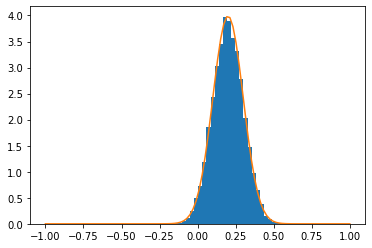

In [2]:
plt.hist(x,density=True,bins=30)
xs = np.linspace(-1,1,100)
plt.plot(xs,f(xs,mu,sigma))

¿Qué porcentaje de $x_p$ fueron aceptados?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, mu, std):
  return (1/np.sqrt(2*np.pi*std**2)) * np.exp(-(x-mu)**2/(2*std**2))

mu = 0.2
sigma = 0.1
delta = 0.5

N = 50000
x = np.zeros(n)
x[0] = 0

acept = 0 #Cuántas veces acepto los xp

for i in range(0,n-1):
  xp = x[i] + np.random.uniform(-delta , delta) #el número aleatorio propuesto estará centrado en x_0, pero puede ser x_0 + delta o x_0 -delta
  if np.random.rand() < min(1, f(xp, mu, sigma)/f(x[i], mu, sigma)):
  #if np.random.rand() < f(xp, mu, sigma)/f(x[i], mu, sigma):
    x[i+1] = xp
    acept+=1
  else:
    x[i+1] = x[i]

print('La aceptación fue del ',acept/n*100, '%')

La aceptación fue del  31.53 %


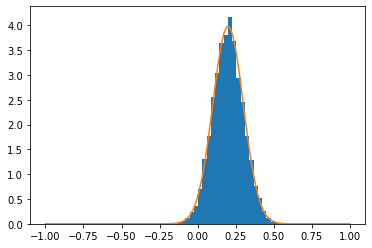

In [ ]:
plt.hist(x,density=True,bins=30)
xs = np.linspace(-1,1,100)
plt.plot(xs,f(xs,mu,sigma))

Si esa $f(x)$ es una función más complicada, la cadana de Markov obtenida me va a permitir obtener la media y la desviación estandar...

In [ ]:
x

array([0.        , 0.        , 0.39615212, ..., 0.47168702, 0.47168702,
       0.47168702])

La cadena obtenida tiene las propiedades de Gauss. 

In [ ]:
np.mean(x),np.std(x)

(0.2004425360601216, 0.10018005524471081)

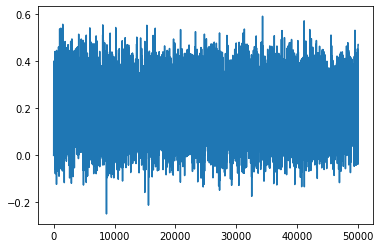

In [ ]:
plt.plot(x)

* ¿Qué sucede si cambiamos el paso y número de muestras? Por ejemplo,  $\Delta x = 1$ y $N = 1000$? 

* ¿Qué sucede si cambiamos $\Delta x = 0.1$ y $N = 1000$?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, mu, std):
  return (1/np.sqrt(2*np.pi*std**2)) * np.exp(-(x-mu)**2/(2*std**2))

mu = 0.2
sigma = 0.1
delta = 1

n = 1000
x = np.zeros(n)
x[0] = 0

acept = 0 #Cuántas veces acepto los xp

for i in range(0,n-1):
  xp = x[i] + np.random.uniform(-delta , delta) #el número aleatorio propuesto estará centrado en x_0, pero puede ser x_0 + delta o x_0 -delta
  if np.random.rand() < min(1, f(xp, mu, sigma)/f(x[i], mu, sigma)):
  #if np.random.rand() < f(xp, mu, sigma)/f(x[i], mu, sigma):
    x[i+1] = xp
    acept+=1
  else:
    x[i+1] = x[i]

print('La aceptación fue del ',acept/n*100, '%')


La aceptación fue del  15.6 %


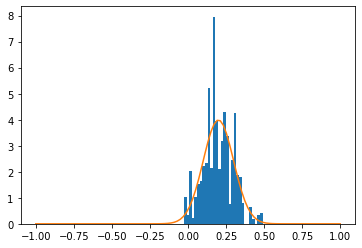

In [ ]:
plt.hist(x,density=True,bins=30)
xs = np.linspace(-1,1,100)
plt.plot(xs,f(xs,mu,sigma))

In [ ]:
x, np.mean(x), np.std(x)

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.14353352,  0.14353352,  0.14353352,  0.14353352,  0.14353352,
         0.14353352,  0.14353352,  0.14353352,  0.14353352,  0.14353352,
         0.14353352,  0.14353352,  0.14353352,  0.14353352,  0.14353352,
         0.14353352,  0.14353352,  0.13437566,  0.13437566,  0.13437566,
         0.13437566,  0.13437566,  0.13437566,  0.13437566,  0.13437566,
         0.13437566,  0.13437566,  0.13437566,  0.13437566,  0.13437566,
         0.15312304,  0.47082238,  0.47082238,  0.47082238,  0.47082238,
         0.47082238,  0.47082238,  0.16961472,  0.16961472,  0.16961472,
         0.30101229,  0.30101229,  0.30101229,  0.30101229,  0.30101229,
         0.30101229,  0.30101229,  0.30101229,  0.30101229,  0.30101229,
         0.30101229,  0.30101229,  0.30101229,  0.30101229,  0.30101229,
         0.30101229,  0.30101229,  0.30101229,  0.30101229,  0.30101229,
         0.30101229,  0.13306658,  0.13306658,  0.1

##**Algoritmo paso a paso**

In [5]:
from scipy.stats import norm

n = 100000
x = np.zeros(n)
x[0] = 0

for i in range(0, 5):
  xp=np.random.normal(x[i],0.5)
  print('Valor actual = ',x[i],'Valor propuesto =', xp)
  U = np.random.rand()
  print('Número aleatorio =',U)

  print('Condición de balance detallado =', norm.pdf(xp,mu,sigma)/norm.pdf(x[i],mu,sigma))
  
  if U < min(1, norm.pdf(xp,mu,sigma)/norm.pdf(x[i],mu,sigma)):
  #if U < norm.pdf(xc,mu,sigma)/norm.pdf(x[i],mu,sigma):
    x[i+1] = xp
  else:
    x[i+1] = x[i]
  print('El siguiente valor = ',x[i+1])
  print('')


Valor actual =  0.0 Valor propuesto = 0.06580453683620072
Número aleatorio = 0.65729274326247
Condición de balance detallado = 3.002901185843146
El siguiente valor =  0.06580453683620072

Valor actual =  0.06580453683620072 Valor propuesto = 0.011624887355809486
Número aleatorio = 0.4369466867010182
Condición de balance detallado = 0.4173466796547146
El siguiente valor =  0.06580453683620072

Valor actual =  0.06580453683620072 Valor propuesto = -0.4948473741273801
Número aleatorio = 0.29208909814587536
Condición de balance detallado = 8.07048413990825e-11
El siguiente valor =  0.06580453683620072

Valor actual =  0.06580453683620072 Valor propuesto = -0.23119048221375268
Número aleatorio = 0.0784803896785019
Condición de balance detallado = 0.00022580461209104516
El siguiente valor =  0.06580453683620072

Valor actual =  0.06580453683620072 Valor propuesto = 0.0521902352836134
Número aleatorio = 0.19540031911823585
Condición de balance detallado = 0.825335580931511
El siguiente valor 

Finalmente, obtenemos una cadena de números que tiene todas las propiedades teóricas de la función $f(x)$ que muestreamos, y a la cual le podemos sacar los puntos máximos, mínimos, media, desviación de los datos.

###**Otro ejemplo:** 
Vamos a aplicar el algoritmo de Metropolis para la siguiente función

$$f(x) = \dfrac{x}{(1+x^2)^2}$$

Inicialmente dibujamos la función entre $[0,10]$ con N = 100.

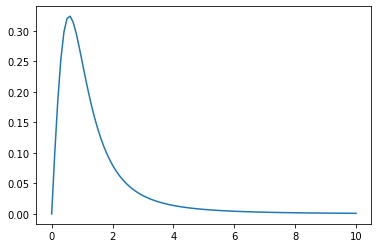

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)

def f(x):
  return x/(1+x**2)**2

plt.plot(x, f(x))

Implementando el algoritmo de Metropolis...

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import random 

def f(x):
  return (x/(1+x**2)**2)

delta = 1

n = 10000
x = np.zeros(n)
x[0] = 1

acept = 0 #Cuántas veces acepto las propuestas

for i in range(0,n-1):
  xp = x[i] + np.random.uniform(-delta , delta) 
  if np.random.rand() < min(1, f(xp)/f(x[i])):
    x[i+1] = xp
    acept+=1
  else:
    x[i+1] = x[i]

print('La aceptación fue del ',acept/n*100, '%')


La aceptación fue del  69.65 %


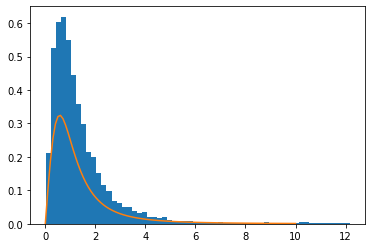

In [5]:
plt.hist(x,density=True,bins=60)
xs2 = np.linspace(0,10,100)
plt.plot(xs2,f(xs2))


¿Por qué la función objetivo no enmarca todo el histograma?

En estos casos, vamos a normalizar la función, para ello, encontremos cuánto vale su integral.

In [6]:
from scipy import integrate
import sympy as sp

x = sp.Symbol('x') 

f = x/((1+x**2)**2) 
#sp.integrate(f,x)
integral = sp.integrate(f,(x, 0, np.infty)) ## Dividimos la función objetivo f(x) por la integral
float(integral)

0.5

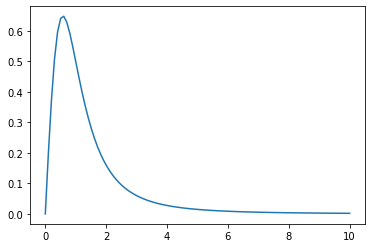

In [7]:
from scipy.integrate import quad

x = np.linspace(0,10,100)

def f(x):
  return x/(1+x**2)**2

normalizacion = quad(f,0, np.infty)[0] #Valor de la integral

plt.plot(x, f(x)/normalizacion)

La aceptación fue del  69.54 %


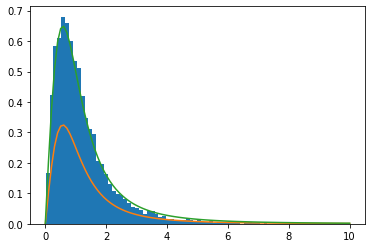

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import random 

def f(x):
  return (x/(1+x**2)**2)

normalizacion = quad(f,0, np.infty)[0]

delta = 1

n = 10000
x = np.zeros(n)
x[0] = 1

acept = 0 #Cuántas veces acepto las propuestas

for i in range(0,n-1):
  xp = x[i] + np.random.uniform(-delta , delta) 
  if np.random.rand() < min(1, f(xp)/f(x[i])):
    x[i+1] = xp
    acept+=1
  else:
    x[i+1] = x[i]

print('La aceptación fue del ',acept/n*100, '%')

plt.hist(x,density=True,bins=60)
xs2 = np.linspace(0,10,100)
plt.plot(xs2,f(xs2))
plt.plot(xs2,f(xs2)/normalizacion)

* ¿Qué sucede si cambiamos el punto de partida? Por ejemplo, $x_0 = 5$ y $\Delta x= 0.1$.

* ¿Qué sucede si el $\Delta x$ es muy grande? Por ejemplo, continuemos con $x_0 = 5$ y $\Delta x= 10$ 

##**Ejercicio**
* Vamos a generar muestras a partir de la siguiente función

$$f(x) = e^{(-x^2)}(2 + sin(5x) + sin(2x))$$


* Usando el algortimo de Metropolis, podemos hacer esto mismo para la mezcla de Gaussinas que trabajamos en aulas pasadas.

[1] Landau, R. H., Páez, M. J. (2018). Computational problems for physics. With Guided Solutions Using Python. CRC Press

[2] Krauth, W. (2006). Statistical mechanics: algorithms and computations (Vol. 13). OUP Oxford.

[3] Beu, T. A. (2014). Introduction to numerical programming: a practical guide for scientists and engineers using Python and C/C++. CRC Press.


